# Predicting Airbnb Listing Prices in Paris  
*Using machine learning to understand key pricing drivers*

## 1. Business Understanding

<div style="text-align: center;">
  <img src="../illustration-images/images.png" width="610" style="display:inline-block; margin-right: 20px;">
  <img src="../illustration-images/paris.jpg" width="340" style="display:inline-block;">
</div>

### 1.1 Business Objectives

Predicting Airbnb listing prices and understanding the most influential features can be highly beneficial to stakeholders.
Renters want proposed prices for accommodations to be attractive, while hosts, seeking profit, want fair pricing guidance without feeling shortchanged. Ultimately, both parties aim for a fair price based on the apartment's characteristics and location.

The goal of this project is to develop a *supervised machine learning* model to:

>* **Understand** the impact of individual features typically found in listings.
>* **Predict** accurate prices based on the characteristics of the apartment.

To carry out this project, we will use Airbnb listing prices data in the city of **Paris** from the past 12 months. Using this dataset, we will train a machine learning model, analyze feature importance, and ultimately deploy the model into production as web app.

<div style='text-align: center;'>
    <img src='../illustration-images/diagram-pipeline.png' width="600">
</div>

This project will interest and benefit the following stakeholders:

>* **Renters**: The model will help renters assess whether the listed price is fair by comparing it to the predicted price. For price-sensitive renters, it also offers insight into which features to prioritize or compromise on to stay within their budget.
>* **Hosts**: Setting a fair and competitive price can be challenging, especially for new hosts. Our model will assist them by offering data-driven price suggestions based on similar apartments. It can also help hosts identify which features to highlight or improve to increase the value of their listing.

### 1.2. Business Success Criteria

In the scope of this project, we aim to achieve the following:

>* **Low RMSE**: We will use the Root Mean Square Error (RMSE) to evaluate the model's performance. Our target is an RMSE below €50, indicating that price estimates are reasonably close to actual values.
>* **Identified key features**: At the end of the project, we aim to clearly identify the most important features that influence pricing.
>* **Lightweight model**: The final model should be as lightweight as possible to enable fast and efficient deployment.




## 2. Data Understanding

### 2.1. Collecting Initial data

The dataset used in this project was sourced from [Inside Airbnb](https://insideairbnb.com/fr/get-the-data/), a platform that provides publicly available Airbnb data for various cities.

For this analysis, we downloaded the Paris listings dataset dated March 3, 2025.

According to Inside Airbnb, the following information is important to note:

- The data is collected from publicly available information on the Airbnb website.

- It has been verified, cleansed, and aggregated by Inside Airbnb.

- The reported location of each listing is obfuscated for privacy reasons, with coordinates randomly displaced within a radius of approximately 150 meters (450 feet) from the actual address.

- Listings within the same building are anonymized individually, which can make them appear scattered on the map.

For further details and assumptions regarding the data collection process, refer to the official [Inside Airbnb Data Assumptions](https://insideairbnb.com/fr/data-assumptions/) page.

In [1]:
#  importing important libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
#adding ./src to the python path
import sys
sys.path.append('../src')
# to reload module in src/ if necessary
import importlib

The dataset is of csv format, so we will use pandas csv reader to load the dataset.

In [2]:
raw_data = pd.read_csv('../data/listings.csv')

According to the Inside Airbnb website, the dataset contains **86,064 listings and 79 attributes** for the city of Paris.

Detailed descriptions of all Airbnb listing attributes can be found [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?gid=1322284596#gid=1322284596). Among these, the following features appear to be the most promising for our analysis:

| Attributes | Type| Description |
|------------|-----|-------------|
| neighbourhood_cleansed |  text | The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles. |
| host_is_superhost | boolean | |
| host_listings_count | text | The number of listings the host has (per Airbnb unknown calculations) |
| host_has_profile_pic | boolean | |
| host_identity_verified | boolean| |
| neighbourhood_cleansed | text | The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles. |
| latitude | numeric | Uses the World Geodetic System (WGS84) projection for latitude and longitude.|
| longitude | numeric | Uses the World Geodetic System (WGS84) projection for latitude and longitude.|
| property_type | text | Self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field |
| room_type | text | Entire home/aptP rivate room/Shared room/Hotel. All homes are grouped into the following three room types: Entire place, Private room, Shared room, Entire place [(see)](https://www.airbnb.com/help/article/5/what-does-the-room-type-of-a-listing-mean)|
| accommodates | integer | The maximum capacity of the listing |
| bathrooms | numeric | The number of bathrooms in the listing|
| bathrooms_text | string | The number of bathrooms in the listing. On the Airbnb web-site, the bathrooms field has evolved from a number to a textual description. For older scrapes, bathrooms is used. |
| bedrooms | integer| The number of bedrooms |
| beds | integer | The number of bed(s)|
| amenities          | JSON      | List of facilities provided in the listing    |
| `price` | currency | daily price in local currency.|
| minimum_nights | integer | minimum number of night stay for the listing (calendar rules may be different) |
| maximum_nights | integer | maximum number of night stay for the listing (calendar rules may be different) |
| reviews_per_month | integer | The average number of reviews per month the listing has over the lifetime of the listing. |
| review_scores_rating | numeric | |
| review_scores_accuracy | numeric | |
| review_scores_cleanliness |numeric | |
| review_scores_checkin | numeric | |
| review_scores_communication | numeric |  |
| review_scores_location | numeric |  |
| review_scores_value | numeric |  |

**Some additional features may have a significant impact on the price, and we will explore them further during the data preparation phase.**

While host-related information may influence a customer's decision to book, it should not directly impact the listing price. Therefore, features such as `host_response_rate`, `host_acceptance_rate`, `host_name`, `host_since`, etc., **appear to be irrelevant** for price prediction. However, we will not exclude them systematically; the final decision will be based on correlation analysis and feature importance evaluations.

The dataset is sufficiently large to train accurate predictive models. However, it's important to note that **price trends may evolve over time** due to changing economic or societal conditions.

Lastly, the dataset provides a **rich set of attributes**, which should be adequate for our modeling objectives.

Other attributes may worth-mensioning:
- `id`: (integer) Airbnb's unique identifier for the listing
- `host_id`: (integer) Airbnb's unique identifier for the host/user


### 2.2 Dataset Overview and Initial Observations

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86064 entries, 0 to 86063
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            86064 non-null  int64  
 1   listing_url                                   86064 non-null  object 
 2   scrape_id                                     86064 non-null  int64  
 3   last_scraped                                  86064 non-null  object 
 4   source                                        86064 non-null  object 
 5   name                                          86064 non-null  object 
 6   description                                   83159 non-null  object 
 7   neighborhood_overview                         42511 non-null  object 
 8   picture_url                                   86063 non-null  object 
 9   host_id                                       86064 non-null 

In [ ]:
#count the number of duplicated listings
raw_data.duplicated(['id']).sum()

0

In [ ]:
print(f'There are {100 * raw_data.isnull().sum().sum() / np.product(raw_data.shape):2.0f}% of missing data.')

There are 13% of missing data


In [33]:
print(f'target variable has {raw_data.price.isna().mean() * 100 :2.0f}% missing value')

target variable has 35% missing value


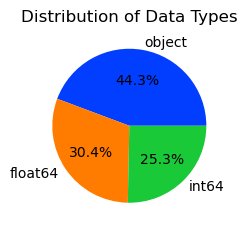

In [3]:
from plot import PlotData

plot=PlotData()
plot.dtypes(raw_data.dtypes.value_counts(), figsize=(2.5, 2.5))
#importlib.reload(PlotData)

As expected, the dataset contains **86,064 entries** with an index ranging from 0 to 86,063, and includes **79 columns**. The data comprises both **numerical** and **categorical** features: approximately **44%** are categorical, while **56%** are numerical (**30.4% `float64`** and **25.4% `int64`**). Around **13% of all values are missing**, and there are **no duplicated listings**.

Two features, `calendar_updated` and `neighbourhood_group_cleansed`, are of type `float64` but contain only missing values.

In [3]:
pd.options.display.max_rows=None

In [7]:
raw_data.isnull().mean()

id                                              0.000000
listing_url                                     0.000000
scrape_id                                       0.000000
last_scraped                                    0.000000
source                                          0.000000
name                                            0.000000
description                                     0.033754
neighborhood_overview                           0.506054
picture_url                                     0.000012
host_id                                         0.000000
host_url                                        0.000000
host_name                                       0.000476
host_since                                      0.000476
host_location                                   0.199410
host_about                                      0.562070
host_response_time                              0.416539
host_response_rate                              0.416539
host_acceptance_rate           

The target variable, `price`, is incorrectly typed as `object`. For proper analysis, it must be converted to `float64`. This requires removing the dollar sign (`$`) and any commas (`,`) before applying `.astype('float')`.

In [4]:
raw_data['price'] = raw_data['price'].replace('[$,]', '', regex=True).astype('float')

>We observe that **35% of the `price` values are missing**. To assess the impact of this missingness, we will analyze whether it is random or associated with other variables. This is crucial, as removing rows with missing `price` values may introduce **bias** if the missingness is not completely at random.

To investigate this, we perform:

* **t-tests** to assess the relationship between `price` missingness and numerical variables.
* **Chi-squared tests of independence** to evaluate associations between `price` missingness and categorical features.

We consider associations **statistically significant** when the p-value is less than **0.05**. 
>The results show that `price` missingness is significantly associated with **approximately 89% of the features**, indicating that dropping these rows would likely **introduce bias** into our model.

### 2.3. Skewness and Outliers in Numerical Features

In [5]:
import importlib
import plot

importlib.reload(plot)

<module 'plot' from 'c:\\Users\\cheic\\Documents\\GitHub\\Predicting-Airbnb-Listing-Prices-in-Paris\\notebooks\\../src\\plot.py'>

The `TestDataset` class defined in `src/plot.py` provides the necessary utilities to perform the association analysis between missingness in the target variable and other features.

⚠️ *Note: The import and reload statements above are for development purposes only and can be removed once the implementation is stable.*

In [27]:
# instantiate the class
drop_num=['neighbourhood_group_cleansed','calendar_updated', 'id', 'host_id', 'scrape_id']
missing_price=plot.TestDataset(df=raw_data, target='price', drop_num=drop_num)

In [45]:
# calculate association with categorical variables
missing_price.categorical_vs_categorical()

In [46]:
# calculate association with numerical variables
missing_price.numerical_vs_numerical()

In [47]:
# gather the result of two above calculation into a dataframe named tot_results
# attribute of the object missing_price
missing_price.gather_results()

missingness dependent on 90% of attributes


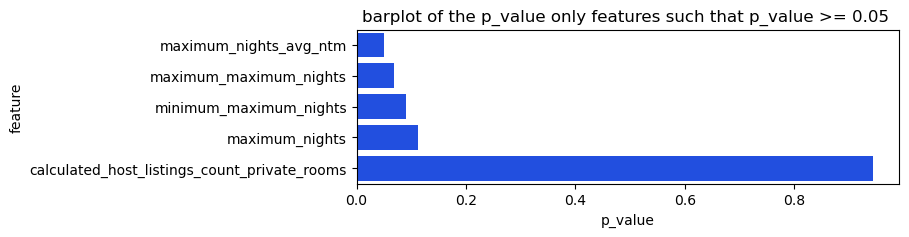

In [40]:
#plot p-value only for feature such as feature-price p-value >= 0.05
plt.figure(figsize=(7,2))
sns.barplot(data=missing_price.total_results[missing_price.total_results.p_value>=0.05], x='p_value',
             y='feature', color=sns.color_palette('bright6')[0])
plt.title("barplot of the p_value only features such that p_value >= 0.05 ")
plt.show()

> The missingness analysis reveals that `price` is statistically associated with approximately 89% of the features. This suggests that the missing data is **not missing at random**. Consequently, dropping rows with missing `price` values would likely **introduce bias** into our dataset and any models trained on it.



### 2.3. Exploring Data

In [6]:
numerical_cols = raw_data.select_dtypes(include=['int', 'float']).columns.drop(['neighbourhood_group_cleansed',
                                                                                 'calendar_updated', 'id', 'host_id', 'scrape_id'])
categorical_cols = raw_data.select_dtypes(include='object').columns

In [23]:
missing_price.data_desc_T

,count,mean,std,min,25%,50%,75%,max
host_listings_count,86023.0,31.603327,1.305905e+02,0.000000,1.000000,1.000000,4.000000,7.824000e+03
host_total_listings_count,86023.0,39.653941,1.624387e+02,0.000000,1.000000,2.000000,5.000000,8.540000e+03
latitude,86064.0,48.864110,1.815601e-02,48.815890,48.850757,48.865395,48.878840,4.890167e+01
longitude,86064.0,2.342990,3.424685e-02,2.229896,2.320919,2.346699,2.368172,2.468360e+00
accommodates,86064.0,3.226878,1.676219e+00,1.000000,2.000000,3.000000,4.000000,1.600000e+01
bathrooms,55911.0,1.205961,5.423655e-01,0.000000,1.000000,1.000000,1.000000,4.200000e+01
bedrooms,78940.0,1.339891,9.050166e-01,0.000000,1.000000,1.000000,2.000000,4.100000e+01
beds,55672.0,1.808467,1.182451e+00,0.000000,1.000000,2.000000,2.000000,1.700000e+01
price,55655.0,251.589884,6.096722e+02,8.000000,97.000000,146.000000,246.000000,3.040000e+04
minimum_nights,86064.0,43.211494,1.094184e+02,1.000000,2.000000,3.000000,6.000000,1.000000e+03


Among the numerical features, approximately **90% exhibit significant skewness**, often caused by outliers or long-tailed distributions. While some skewness may be legitimate (e.g., due to property size or location), extreme values—such as a maximum price two orders of magnitude greater than the 75th percentile—warrant further investigation for potential data entry errors or rare, high-end listings.

In [41]:
features_with_outliers = missing_price.detect_outliers_iqr()

Here are examples of features with **potential outliers** that need to be addressed during preprocessing:
```
['host_listings_count', 'host_total_listings_count', 'longitude',
 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
 'maximum_minimum_nights', 'minimum_maximum_nights',
 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm', 'number_of_reviews', 'number_of_reviews_ltm',
 'number_of_reviews_l30d', 'number_of_reviews_ly',
 'estimated_occupancy_l365d', 'estimated_revenue_l365d',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']
```

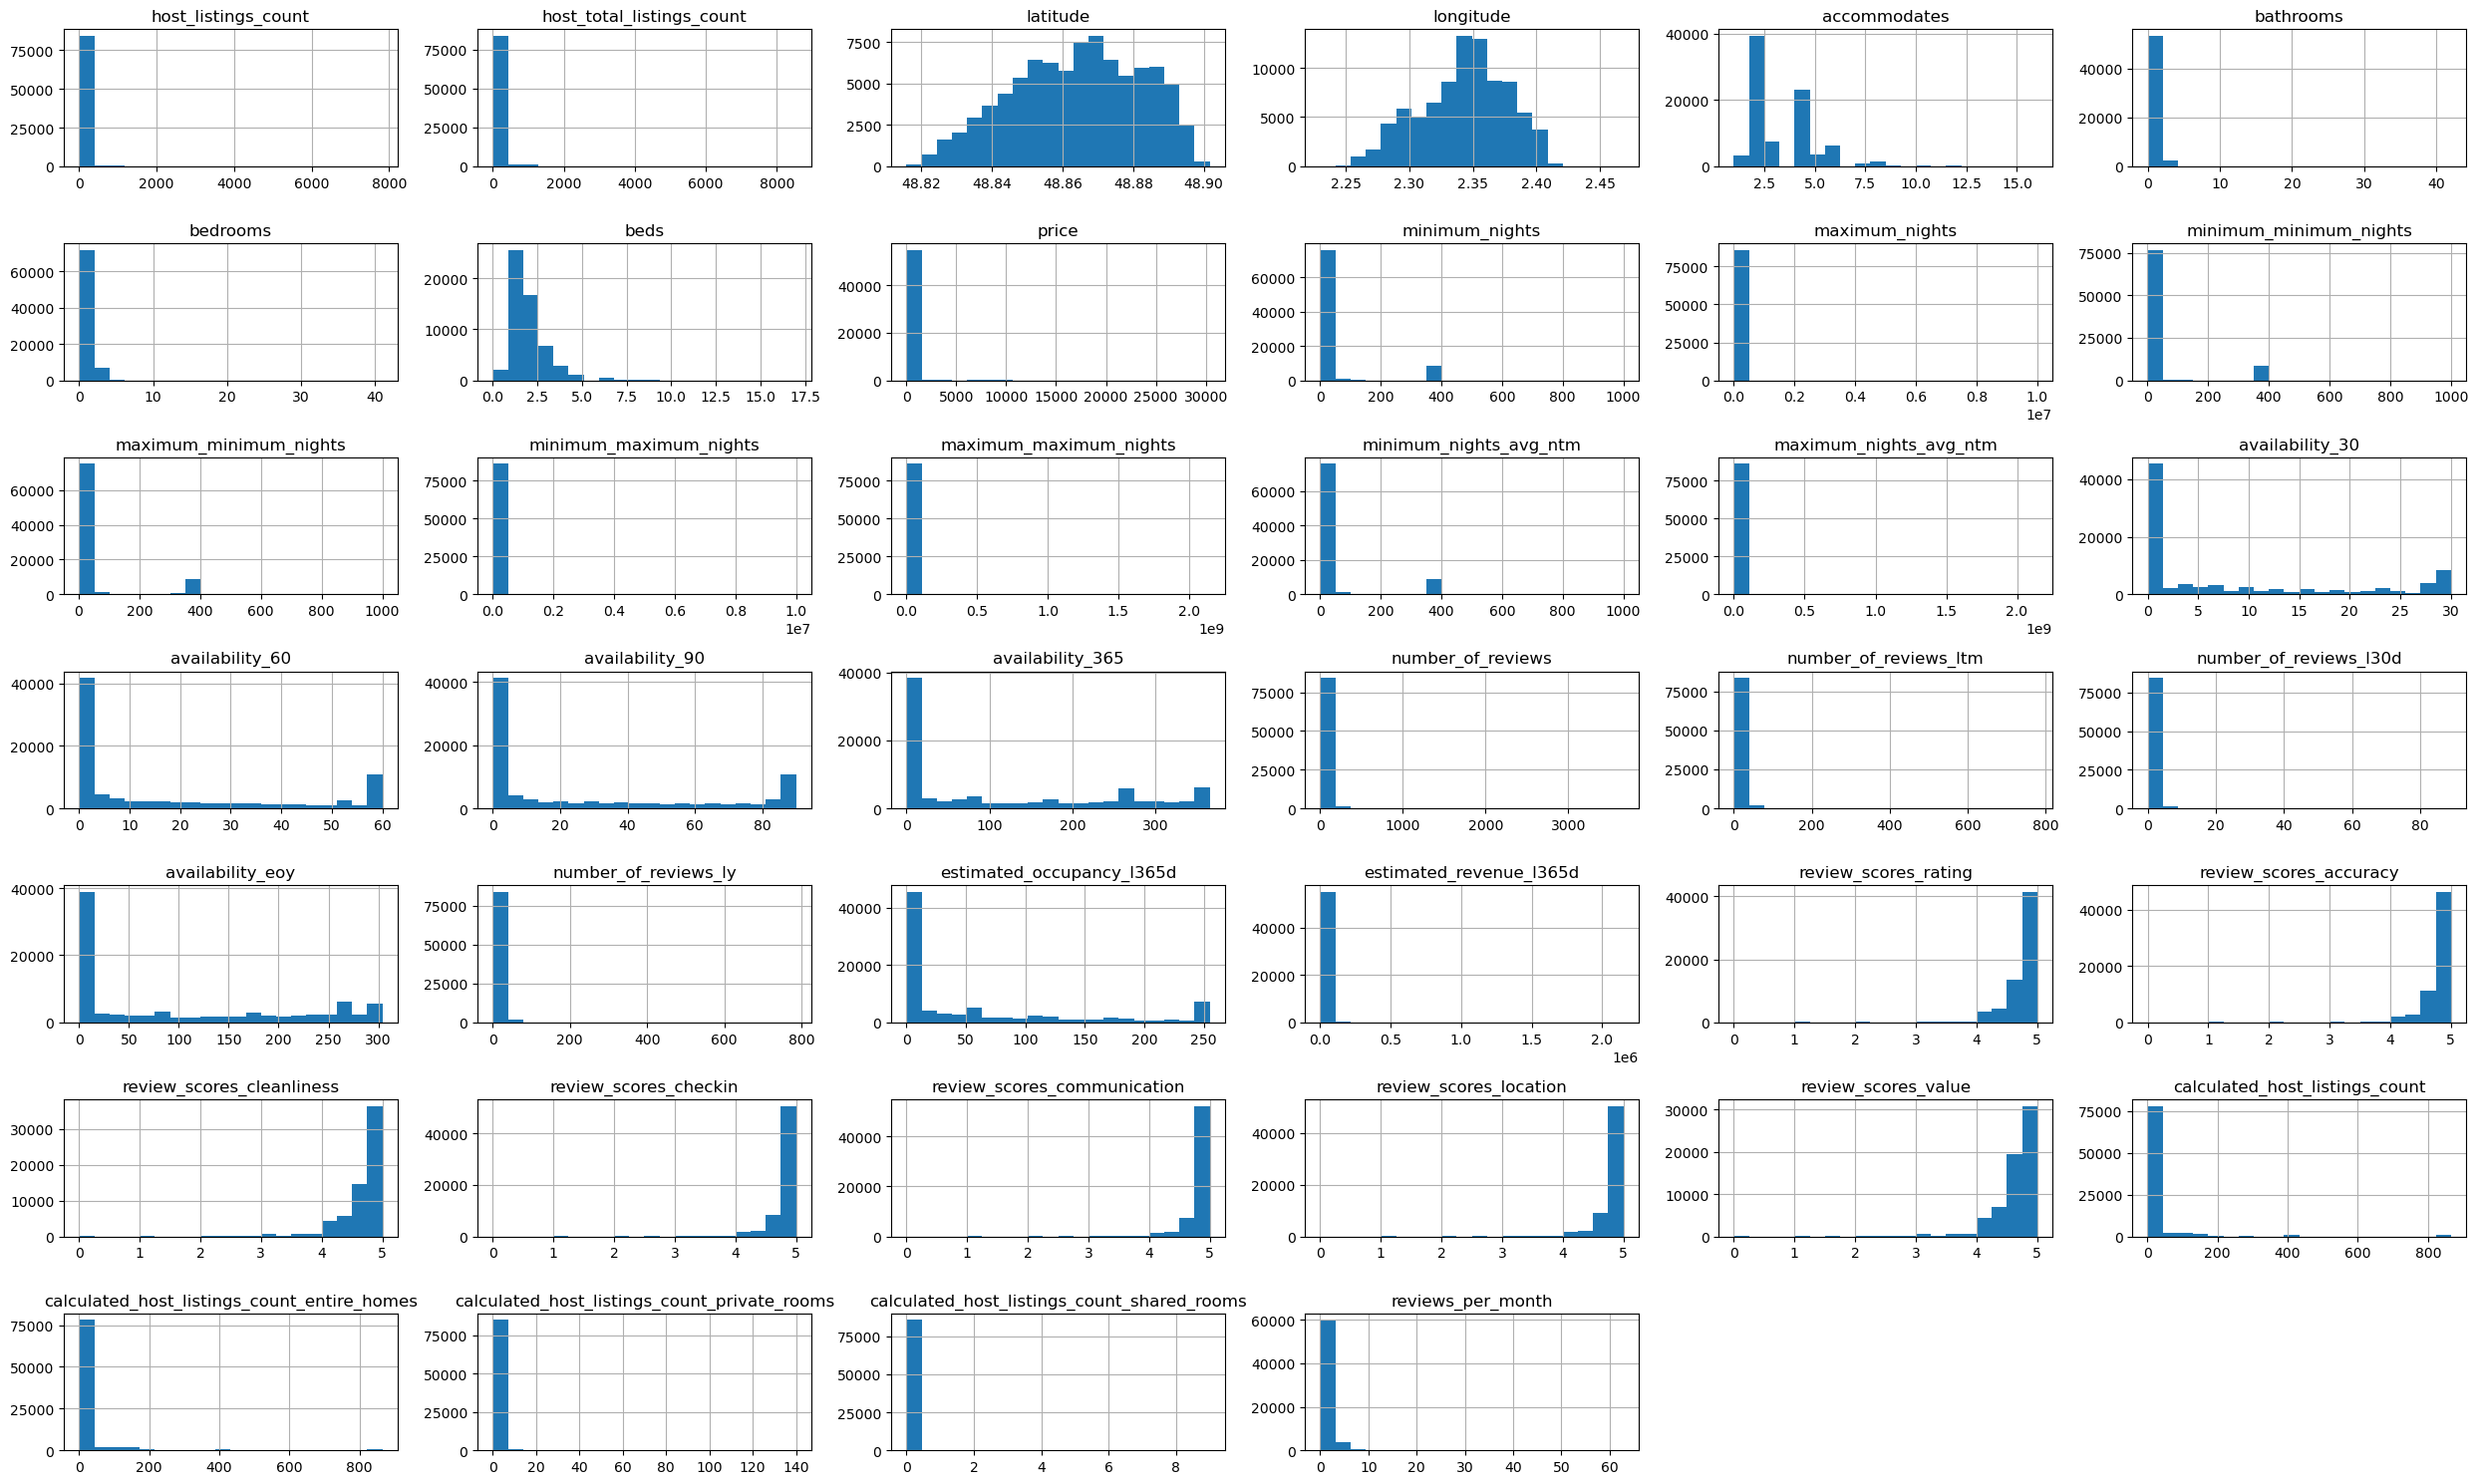

In [ ]:
raw_data[numerical_cols].hist(bins=20, figsize=(25,15))
plt.tight_layout()
plt.show()

In [10]:
#bathrooms
raw_data[raw_data.bathrooms > 10].price

77991    155.0
Name: price, dtype: float64

c:\Users\cheic\Documents\GitHub\Predicting-Airbnb-Listing-Prices-in-Paris\notebooks\../src\plot.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_skew.index, y=data_skew.values, palette=colors)


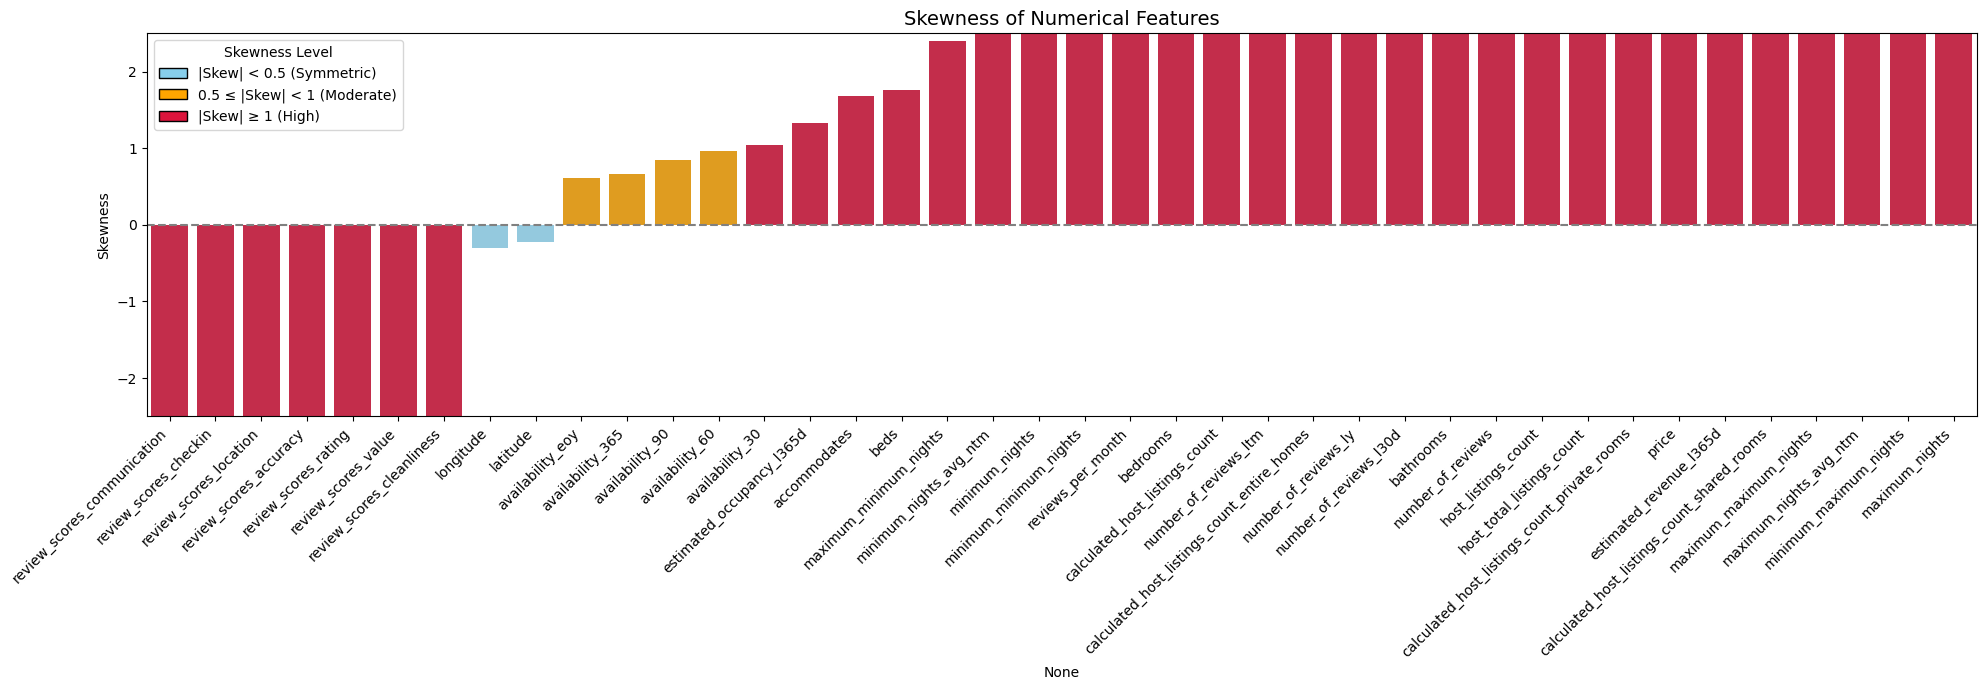

In [41]:
plot.PlotData.plot_skewness(raw_data[numerical_cols].skew().sort_values(), figsize=(20, 7))

* Features like `longitude` and `latitude` appear symmetrically distributed.
* Availability-related features show **moderate symmetry**.
* The **majority of numerical variables are highly skewed**.

Since we aim for **model interpretability**, particularly with **linear models**, it is essential to **normalize or transform** skewed features using techniques like **Box-Cox**, **log**, or **power transformations**.

### 2.4. Missing Data in Categorical Features

In [182]:
for col in categorical_cols:
    print(f"{col} - Unique: {raw_data[col].nunique()}, Missing: {raw_data[col].isnull().mean():.2%}")
    print(raw_data[col].value_counts(normalize=True).head())
    print()

listing_url - Unique: 86064, Missing: 0.00%
listing_url
https://www.airbnb.com/rooms/3109                   0.000012
https://www.airbnb.com/rooms/1034184837235986445    0.000012
https://www.airbnb.com/rooms/1034981519787141839    0.000012
https://www.airbnb.com/rooms/1034973471790578615    0.000012
https://www.airbnb.com/rooms/1034953572709346925    0.000012
Name: proportion, dtype: float64

last_scraped - Unique: 14, Missing: 0.00%
last_scraped
2025-03-04    0.220859
2025-03-03    0.139989
2025-03-15    0.092280
2025-03-06    0.088399
2025-03-07    0.074491
Name: proportion, dtype: float64

source - Unique: 2, Missing: 0.00%
source
city scrape        0.649819
previous scrape    0.350181
Name: proportion, dtype: float64

name - Unique: 79697, Missing: 0.00%
name
Appartement                      0.001092
Charmant appartement parisien    0.000953
Appartement Montmartre           0.000651
Appartement Paris                0.000639
Appartement au cœur de Paris     0.000581
Name: proportion,

Most categorical features have relatively low missingness. However, the table below summarizes those with a high proportion of missing data:

| Feature                | Missing Rate (%) |
| ---------------------- | ---------------- |
| license                | 21               |
| last\_review           | 25               |
| first\_review          | 25               |
| host\_neighbourhood    | 65               |
| host\_acceptance\_rate | 32               |
| host\_response\_rate   | 42               |
| host\_response\_time   | 42               |
| host\_about            | 56               |
| host\_location         | 20               |
| neighborhood\_overview | 51               |

Additionally, **many categorical variables have more than 10 unique values**, which could make them unsuitable for one-hot encoding due to dimensionality concerns.

### 2.5. Univariate Categorical Feature Analysis

We proceed to visualize the distribution of categorical variables with fewer than 10 unique values. Notably:

* The `room_type` feature is **heavily imbalanced** in favor of **"Entire home/apt"**.
* The `neighbourhood` column has **only one unique value** ("Neighborhood highlights"), making it uninformative for modeling.

In [7]:
cols_to_plot = [col for col in categorical_cols if raw_data[col].nunique() < 10]
len_cols_to_plot = len(cols_to_plot)

In [ ]:
#import importlib
#import plot

#importlib.reload(plot)

<module 'plot' from 'c:\\Users\\cheic\\Documents\\GitHub\\Predicting-Airbnb-Listing-Prices-in-Paris\\notebooks\\../src\\plot.py'>

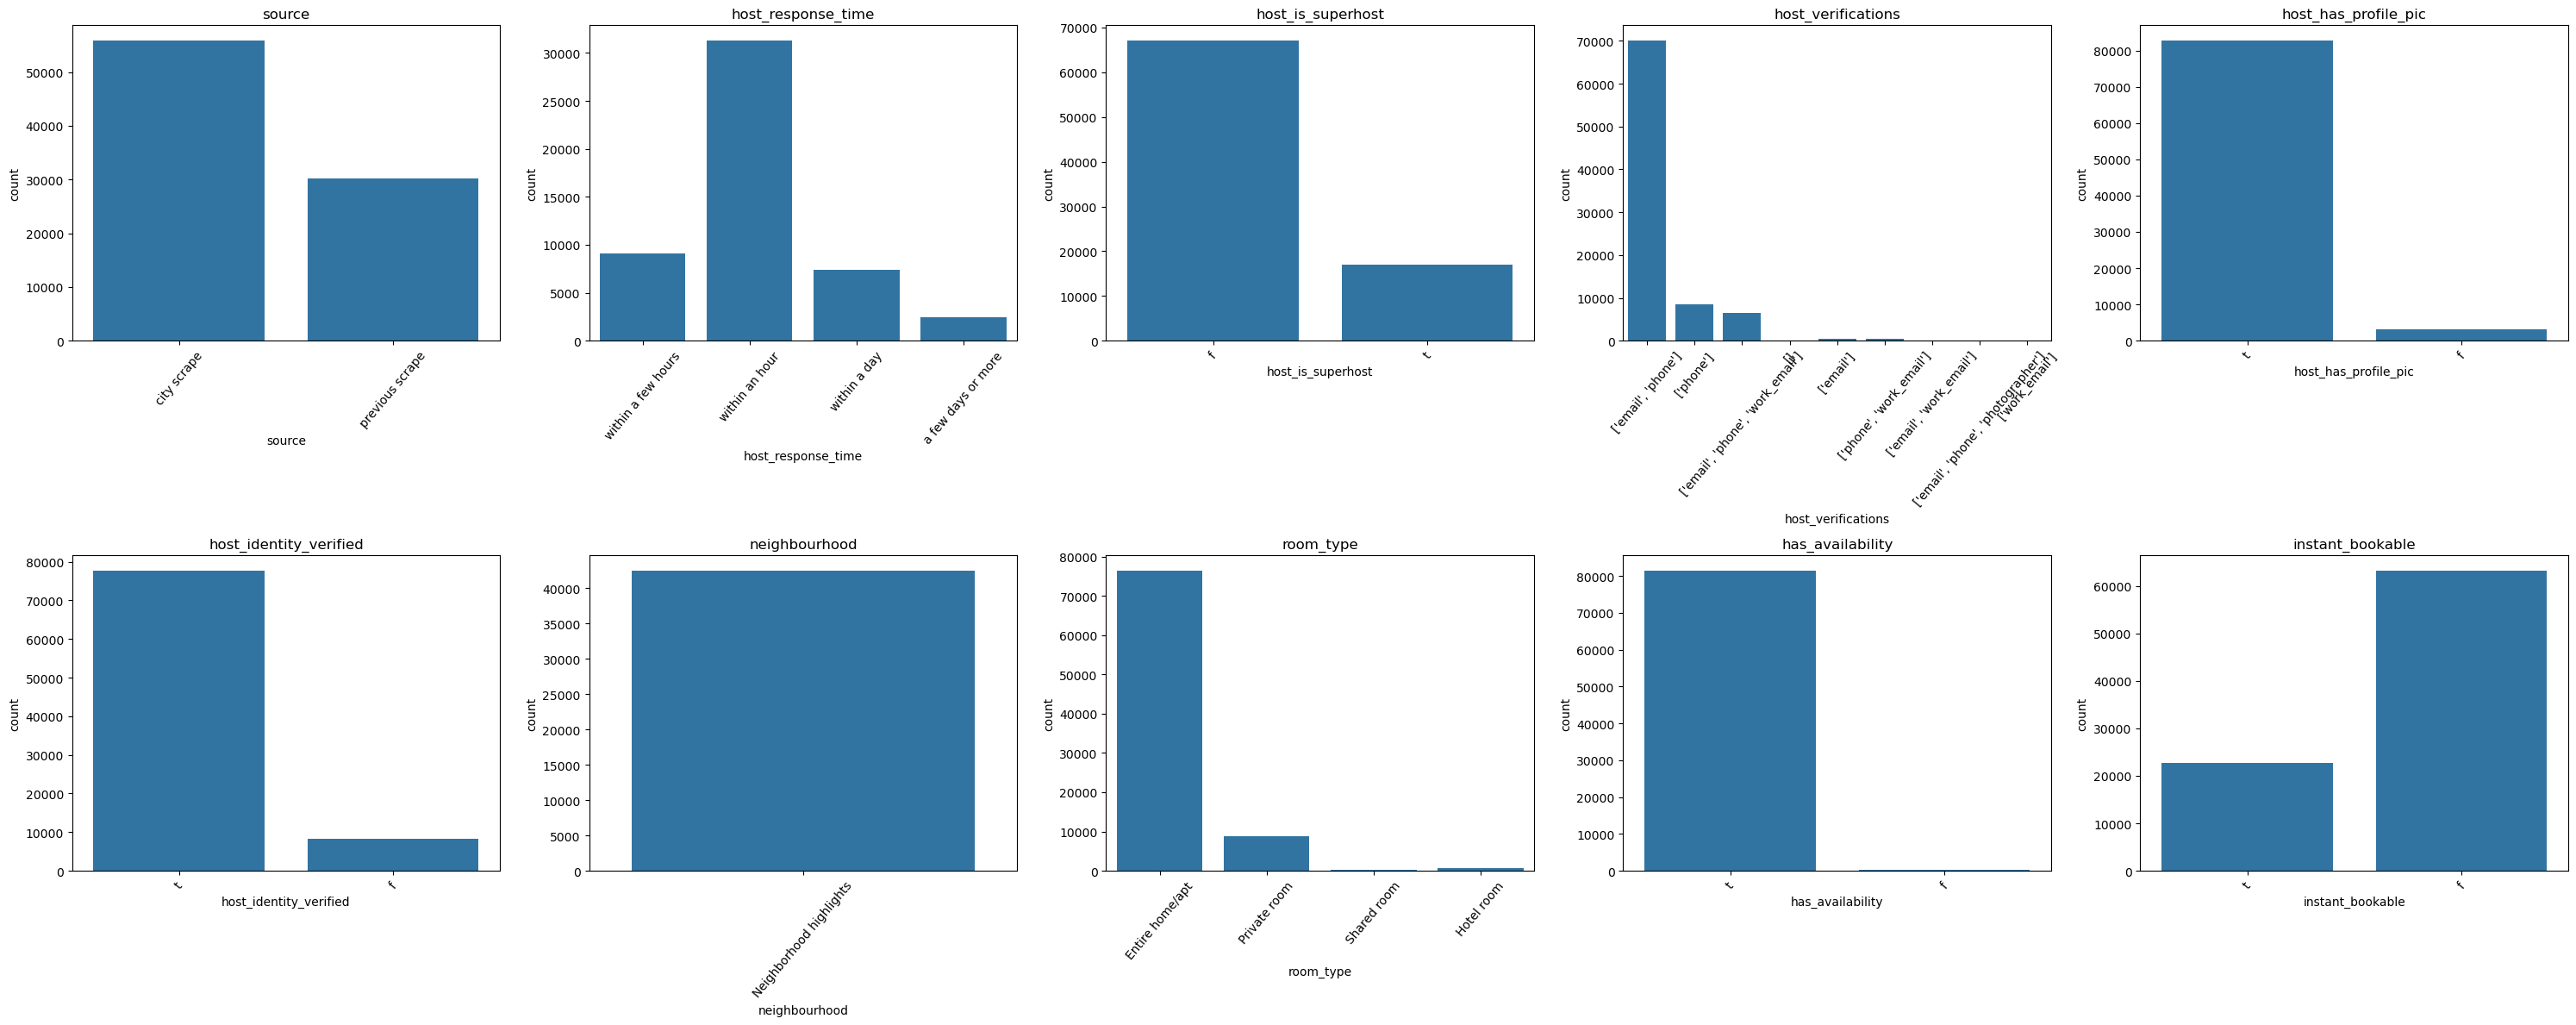

In [47]:
plot.PlotData.countplot__cat_var(df=raw_data, categorical_cols=cols_to_plot, max_ncols=5, figsize=(30, 12))

In [46]:
#corr = raw_data[numerical_cols].corr()
#plt.figure(figsize=(20, 20))
#sns.heatmap(data=corr,)
#plt.show()

In [ ]:
#import importlib
#import plot
#
#importlib.reload(plot)

<module 'plot' from 'c:\\Users\\cheic\\Documents\\GitHub\\Predicting-Airbnb-Listing-Prices-in-Paris\\notebooks\\../src\\plot.py'>

## 🧾 Summary: Business & Data Understanding

In this project, our goal is to **predict Airbnb listing prices in Paris** based on apartment **attributes** and **location**. Attributes directly related to the host or reviews (e.g., `host_name`, `host_response_rate`, or `review_scores`) are considered **less relevant** for price prediction, as they often reflect guest experience rather than intrinsic listing value. Nevertheless, we initially keep them for analysis and will make informed feature selection decisions later.

The dataset consists of **86,064 listings** and **79 attributes**, including both **numerical** and **categorical** variables. Approximately **13% of the entries are missing**, and no duplicate listings were found. Two attributes—`calendar_updated` and `neighbourhood_group_cleansed`—are entirely empty and will be removed.

The target variable, `price`, is stored as a string with currency formatting and must be converted to a numeric type (`float64`). Roughly **35% of the `price` values are missing**. A statistical analysis was conducted to assess whether this missingness is random. Results show that **`price` missingness is statistically associated with nearly 89% of other features**, indicating that **dropping rows with missing prices would introduce bias** into the model. Therefore, this issue will require a more thoughtful imputation or modeling strategy.

Additionally, most numerical variables are **highly skewed**, and **outliers are present** in a large portion of them. This skewness and the presence of extreme values may be due to real-world variations or possible errors (e.g., unusually high listing prices). These will need to be addressed during the preprocessing phase using **transformation techniques** (like log or Box-Cox) and outlier treatment strategies.

A large number of categorical variables have **many unique values**, making them challenging to use directly in models. Some important features (e.g., `room_type`) are **highly imbalanced**, while others (e.g., `neighbourhood`) may offer no variance and will likely be discarded.

In the next section, we will proceed with **data cleaning and preparation**, focusing on:

* Handling missing values,
* Addressing outliers and skewness,
* Reducing dimensionality,
* Selecting relevant features for modeling.

This foundational understanding ensures that our predictive model will be both accurate and interpretable, aligned with our goal of delivering business value through price estimation.
